# Randomness and Probability

In this exercise, we will use random.choice to produce random samples with and without replacement. Follow these steps to complete this exercise:

1.Import the NumPy library:

In [27]:
import numpy as np

2.Create two lists containing four different suits and 13 different ranks in the set of standard cards:

In [28]:
suits=['clubs','diamond','hearts','spades']
# ranks=['Ace', 'Jack', 'Queen', 'King']+ list(range(2,11))
ranks=['Ace','2','3','4','5','6','7','8','9','10','Jack', 'Queen', 'King']

3.Create a list, named cards, containing the 52 cards of the standard deck:

In [29]:
import itertools
suits=['clubs','diamond','hearts','spades']
# ranks=['Ace', 'Jack', 'Queen', 'King']+ list(range(2,11))
ranks=['Ace','2','3','4','5','6','7','8','9','10','Jack', 'Queen', 'King']

cards = list(itertools.product(ranks, suits))
# or
cards=[(i,j) for i in ranks for j in suits]
print(cards)

[('Ace', 'clubs'), ('Ace', 'diamond'), ('Ace', 'hearts'), ('Ace', 'spades'), ('2', 'clubs'), ('2', 'diamond'), ('2', 'hearts'), ('2', 'spades'), ('3', 'clubs'), ('3', 'diamond'), ('3', 'hearts'), ('3', 'spades'), ('4', 'clubs'), ('4', 'diamond'), ('4', 'hearts'), ('4', 'spades'), ('5', 'clubs'), ('5', 'diamond'), ('5', 'hearts'), ('5', 'spades'), ('6', 'clubs'), ('6', 'diamond'), ('6', 'hearts'), ('6', 'spades'), ('7', 'clubs'), ('7', 'diamond'), ('7', 'hearts'), ('7', 'spades'), ('8', 'clubs'), ('8', 'diamond'), ('8', 'hearts'), ('8', 'spades'), ('9', 'clubs'), ('9', 'diamond'), ('9', 'hearts'), ('9', 'spades'), ('10', 'clubs'), ('10', 'diamond'), ('10', 'hearts'), ('10', 'spades'), ('Jack', 'clubs'), ('Jack', 'diamond'), ('Jack', 'hearts'), ('Jack', 'spades'), ('Queen', 'clubs'), ('Queen', 'diamond'), ('Queen', 'hearts'), ('Queen', 'spades'), ('King', 'clubs'), ('King', 'diamond'), ('King', 'hearts'), ('King', 'spades')]


4.Use the np.random.choice function to draw a hand (five cards) from the deck. Use replace=False so that each card gets selected only once:

In [30]:
from numpy.random import choice
import pandas as pd

In [31]:
#The result should look something like this (you might get different cards): 
#['Ace-clubs' '5-clubs' '7-clubs' '9-clubs' '6-clubs']
card_series=pd.Series(cards)

['-'.join(card_series[i]) for i in choice(52,5,replace=False)]


['Queen-spades', '2-hearts', '10-clubs', '9-clubs', '2-clubs']

5.Now, create a function named deal_hands that returns two lists, each with five cards drawn from the same deck. Use replace=False in the np.random.choice function. This function will perform sampling without replacement:

To print the output, run the function like so:
deal_hands()

In [32]:
from numpy.random import choice
def deal_hands():
    c=[card_series[i] for i in choice(52,10,replace=False)]
    print(c[:len(c)//2], c[len(c)//2:], sep='\n')
        
deal_hands()
        

[('4', 'hearts'), ('6', 'hearts'), ('Jack', 'diamond'), ('8', 'clubs'), ('Jack', 'spades')]
[('9', 'diamond'), ('7', 'spades'), ('3', 'clubs'), ('5', 'hearts'), ('6', 'diamond')]


In [33]:
#You should get something like this:
#(['9-spades', 'Ace-clubs', 'Queen-diamonds', '2-diamonds',  '9-diamonds'],
# ['Jack-hearts', '8-clubs', '10-clubs', '4-spades', 'Queen-hearts'])

6.Create a second function called deal_hands2 that's identical to the last one, but with the replace=True argument in the np.random.choice function. This function will perform sampling with replacement:

In [34]:
def deal_hands2():
    c=[card_series[i] for i in choice(52,10,replace=True)]
    print(c[:len(c)//2], c[len(c)//2:], sep='\n')
    
deal_hands2()

[('10', 'diamond'), ('10', 'hearts'), ('9', 'diamond'), ('Jack', 'diamond'), ('Ace', 'spades')]
[('5', 'spades'), ('6', 'hearts'), ('2', 'clubs'), ('6', 'spades'), ('4', 'hearts')]


7.Finally, run the following code: 

In [35]:
np.random.seed(2)
deal_hands2()

[('Jack', 'clubs'), ('4', 'spades'), ('Queen', 'diamond'), ('3', 'clubs'), ('6', 'hearts')]
[('Jack', 'spades'), ('5', 'hearts'), ('3', 'spades'), ('Jack', 'clubs'), ('2', 'spades')]


# Binomial Distribution

### Exercise: Checking If a Random Variable Follows a Binomial Distribution

In this exercise, we will practice how to verify if a random variable follows a binomial distribution. We will also create a random variable using scipy.stats and plot the distribution. This will be a mostly conceptual exercise.

Here, we will check if the random variable, Z: number of defective auto parts in a 12-box pack, follows a binomial distribution (remember that we consider 4% of the auto parts are defective). Follow these steps to complete this exercise:

1.Import NumPy, Matplotlib, and scipy.stats following the usual conventions:

In [36]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

2.Try to conceptually check if Z fulfills the properties given for a binomial random variable:

The standard normal distribution is a normal distribution with a mean of zero and standard deviation of 1.  when using a standard normal distribution, we will use "Z" to refer to a variable in the context of a standard normal distribution.

standarize edilmis normal dagilimin ortalamasindan(0) kac sigma(standart sapma) uzakta oldugumuza Z score denir.

3.Determine the p and n parameters for the distributions of this variable, that is, p = 0.04 and n = 12.

In [37]:
(n, p) = (12, 0.04)

4.Use the theoretical formula with the former parameters to get the exact theoretical probability of getting exactly one defective piece per box (using x = 1): 

#Use formula to calculate it.
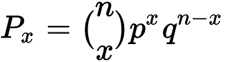

In [38]:
f =lambda x:x<2 or x*f(x-1)
com =lambda n,k: f(n) / (f(n-k)*f(k))

k=1
print('P(X = %s): %s' % ( k, com(n, k) * (p**k) * (1-p)**(n-k) ))

P(X = 1): 0.3063548786648836


5.Use the scipy.stats module to produce an instance of the Z random variable. Name it Z_r:

In [41]:
binomDist = stats.binom(n, p)
Z_r=binomDist.rvs(1000) #dist

6.Plot the probability mass function of Z:

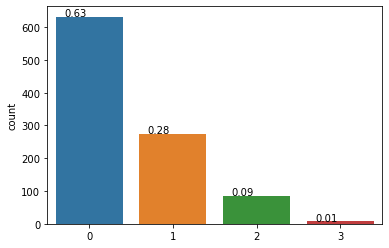

In [42]:
ax=sns.countplot(Z_r)

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()/len(Z_r)), (p.get_x()+0.1, p.get_height()+1))

In [43]:
print("r\tpmf\tcdf\n_\t____\t___")
for i in range(n+1):
    print(str(i) + "\t" + str(round(binomDist.pmf(i),4)) + "\t" + str(round(binomDist.cdf(i),4)))

r	pmf	cdf
_	____	___
0	0.6127	0.6127
1	0.3064	0.9191
2	0.0702	0.9893
3	0.0098	0.999
4	0.0009	0.9999
5	0.0001	1.0
6	0.0	1.0
7	0.0	1.0
8	0.0	1.0
9	0.0	1.0
10	0.0	1.0
11	0.0	1.0
12	0.0	1.0


# Normal Distribution

### Exercise: Using the Normal Distribution in Education

In this exercise, we'll use a normal distribution object from scipy.stats and the cdf and its inverse, ppf, to answer questions about education.

In psychometrics and education, it is a well-known fact that many variables relevant to education policy are normally distributed. For instance, scores in standardized mathematics tests follow a normal distribution. In this exercise, we'll explore this phenomenon: in a certain country, high school students take a standardized mathematics test whose scores follow a normal distribution with the following parameters: mean = 100, standard deviation = 15. Follow these steps to complete this exercise:

1.Import NumPy, Matplotlib, and scipy.stats following the usual conventions:

In [47]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

2.Use the scipy.stats module to produce an instance of a normally distributed random variable, named X_rv, with mean = 100 and standard deviation = 15:

In [48]:
(mu, sigma) = (100, 15)
normDist = stats.norm(mu, sigma)
X_rv=normDist.rvs(10000)

In [54]:
mu_rv=np.mean(X_rv)
mu_rv

99.86396380793158

In [55]:
sigma_rv=np.std(X_rv)
sigma_rv

15.041097717340236

3.Plot the probability distribution of X:

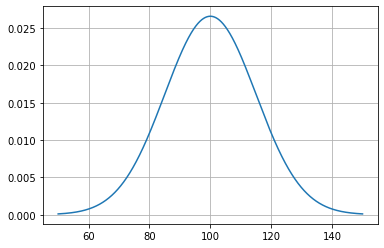

In [60]:
x = np.linspace(50, 150, 10000)
plt.plot(x, y)
plt.grid()
plt.show()

4.The Ministry of Education has decided that the minimum score for someone to be considered competent in mathematics is 80. Use the cdf method to calculate the proportion of students that will get a score above that score:

In [61]:
1-normDist.cdf(80)

0.9087887802741321

5.A very selective university wants to set very high standards for high school students that are admitted to their programs. The policy of the university is to only admit students with mathematics scores in the top 2% of the population. Use the ppf method (which is essentially the inverse function of the cdf method) with an argument of 1 - 0.02 = 0.98 to get the cut-off score for admission:

In [62]:
# ppf(percent point function) aka inverse of ctf(cumulative distribution function) aka Quantile function
normDist.ppf(0.98)

130.80623365947733

In this exercise, we used a normal distribution and the cdf and ppf methods to answer real-world questions about education policy.

**1. Say you draw a circle and choose two chords at random. What is the probability that those chords will intersect?** 

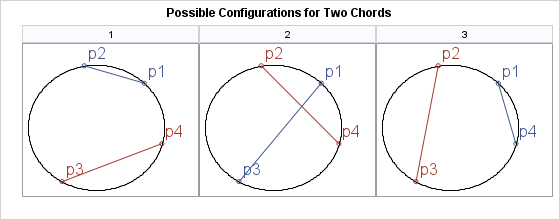

1/3

2. In random sampling the probability of selecting an item from a population is unknown. 
False**